In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special, optimize

In [2]:
# define a function for the dispersion relation
def first_dispersion_relation(x, L_T_lambda):
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.4 # 2*np.pi/64 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    k_z_lambda = 2*np.pi/32 # k_z * lambda_i
    temp_ratio = 1 # T_e/T_i
    
    # normalised omega^T_i
    omega_t = k_y_lambda*L_T_lambda
    # normalised omega^n_e
    omega_n = - k_y_lambda*temp_ratio*L_n_lambda**(-1)
    # normalised omega^2_s -- already squared here!!!
    omega_2s = temp_ratio*k_z_lambda**2 
    
    # return the expression for the dispersion relation
    return x**3 - x**2 *omega_n - (7/6)*x*omega_2s + omega_2s*omega_t + (1/15)*omega_2s*omega_n

# calculate the numerical solution

import numpy as np
from scipy import optimize

# define values for lambda_i/L_T
L_T_lambda_num = np.linspace(1, 50, 50)
# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array

L_T_lambda_num_list = L_T_lambda_num.tolist() 

first_omega_numerical = [] # list to keep the root

# first loop for the first results
for i in L_T_lambda_num_list[:10]:
    # find the root
    solution = optimize.root_scalar(first_dispersion_relation, x0 = 0.1 + 0.1j, 
                                     x1 = 2 + 2j, args=i, method='secant')
    # save the root
    first_omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in L_T_lambda_num_list[10:]:
    
    # add some noise to the roots for the guesses
    guess_0 = first_omega_numerical[L_T_lambda_num_list.index(i)-1] - first_omega_numerical[L_T_lambda_num_list.index(i)-1]/10
    
    guess_1 = first_omega_numerical[L_T_lambda_num_list.index(i)-1] + first_omega_numerical[L_T_lambda_num_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(first_dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    first_omega_numerical.append(solution.root)
    
first_omega_numerical = np.asarray(first_omega_numerical)

In [3]:
# define a function for the modified dispersion function
def dispersion_funcion(z):
    import numpy as np
    from scipy import special
    
    # calculate Z_{0, 0}(a)
    Zeta_00 = 1j*np.pi*special.wofz(z)
    # calculate Z_{1, 0}(a)
    Zeta_10 = z*Zeta_00 + special.gamma(1/2)
        
    # return the modified dispersion function
    return 1/(np.sqrt(np.pi))*Zeta_10

In [4]:
# define a function for the dispersion relation
def full_dispersion_relation(x, L_T_lambda):
    import numpy as np
   
    # x = omega/Omega_i (normalised complex frequency)
    
    # set the parameters
    k_y_lambda = 0.4 # 2*np.pi/64 # k_y * lambda_i
    L_n_lambda = 10**5 # L_n/lambda_i
    k_z_lambda = 2*np.pi/32 # k_z * lambda_i
    temp_ratio = 1 # T_e/T_i
    mass_ratio = 10**5 #1836 # m_i/m_e (protons)
    lambda_d = 10**2 # lambda_i/lambda_D
        
    # normalised omega^T_i
    omega_ti = k_y_lambda*L_T_lambda
    # normalised omega^T_e
    omega_te = 0#- k_y_lambda*L_T_lambda*temp_ratio
    
    # normalised omega^n_i
    omega_ni =  k_y_lambda*L_n_lambda**(-1)
    # normalised omega^n_e
    omega_ne = 0#- k_y_lambda*L_n_lambda**(-1)*temp_ratio
    
    z_i = x/k_z_lambda
    z_e = x/(k_z_lambda*temp_ratio**(1/2)*mass_ratio**(1/2))
    
    xi_i = 0.2 * k_y_lambda**2
    xi_e = 0.2 * (k_y_lambda*mass_ratio**(-1/2)*temp_ratio**(1/2))**2
        
    bes_i0 = special.ive(0, xi_i) # order 0 bessel function for ions
    bes_i1 = special.ive(1, xi_i) # order 1 bessel function for ions
    
    # order 0 bessel function for electrons
    bes_e0 = special.ive(0, xi_e)
    # order 1 bessel function for electrons
    bes_e1 = special.ive(1, xi_e)

    # ion dispersion functions
    Wi = dispersion_funcion(z_i/np.sqrt(2.0))
    
    # electron dispersion function
    We = dispersion_funcion(z_e/np.sqrt(2.0))
    
    # return the expression for the dispersion relation
    return x*temp_ratio*(k_z_lambda**2 *lambda_d**(-2) + k_y_lambda**2 *lambda_d**(-2)) + x*(1 + We*bes_e0 - bes_e0) + (-omega_ne + omega_te/2)*(We-1)*bes_e0 - omega_te*(z_e**2 *We*bes_e0/2 + (We-1)*xi_e*(bes_e1-bes_e0)) + temp_ratio*(x*(1+Wi*bes_i0-bes_i0) + (-omega_ni + omega_ti/2)*(Wi-1)*bes_i0 - omega_ti*(z_i**2 *Wi*bes_i0/2 + (Wi-1)*xi_i*(bes_i1-bes_i0)))

# calculate the full numerical solution

from scipy import optimize, special

# define values for lambda_i/L_T
L_T_lambda_num = np.linspace(1, 50, 50)

# turn it to python list for the indexing in the loop
# it's easier compared to the numpy array
L_T_lambda_num_list = L_T_lambda_num.tolist() 


full_omega_numerical = [] # list to keep the root

# first loop for the first results
for i in L_T_lambda_num_list[:10]:
    # find the root
    solution = optimize.root_scalar(full_dispersion_relation, x0 = 0.1 + 0.01j, 
                                     x1 = 0.3 + 0.1j, args=i, method='secant')
    # save the root
    full_omega_numerical.append(solution.root)
    
    #print(k_z_lambda_list.index(i))

# big loop that uses as guesses the previous roots
for i in L_T_lambda_num_list[10:]:
    
    # add some noise to the roots for the guesses
    guess_0 = full_omega_numerical[L_T_lambda_num_list.index(i)-1] + full_omega_numerical[L_T_lambda_num_list.index(i)-1]/10
    
    
    guess_1 = full_omega_numerical[L_T_lambda_num_list.index(i)-1] - full_omega_numerical[L_T_lambda_num_list.index(i)-1]/10
    
    # calculate root
    solution = optimize.root_scalar(full_dispersion_relation, x0 = guess_0, 
                                    x1 = guess_1, args=i, method='secant')
    # save root
    full_omega_numerical.append(solution.root)
    
full_omega_numerical = np.asarray(full_omega_numerical)

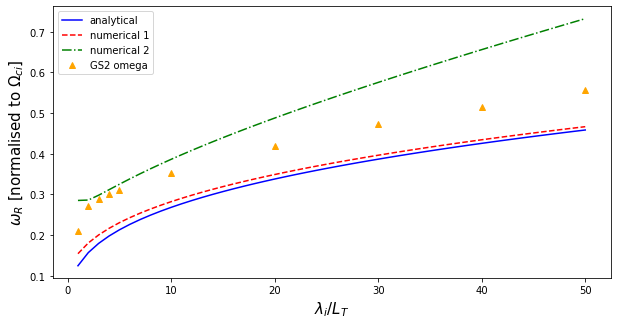

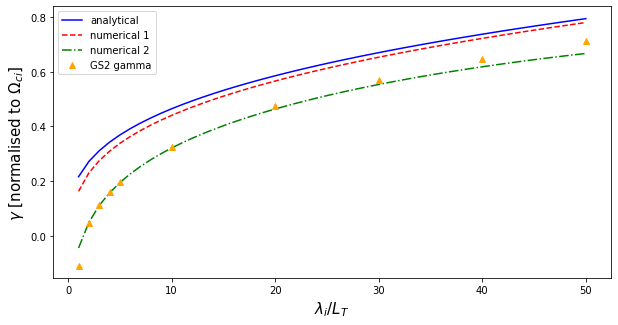

In [5]:
# plot gamma and omega for analytical 1, numericals 1 and 2 and gs2

LrefLT = np.array([1, 2, 3, 4, 5, 10, 20, 30, 40, 50])

# data for gs2 (sqrt(2)*data due to normalisation difference)
# gs2 -> bes_func = 0.2, ky = sqrt(2)*0.4
gs2_omega_besfunc02 = np.sqrt(2)*np.array([0.149, 0.192, 0.204, 0.212, 0.219, 0.250, 0.297, 0.334, 0.365, 0.394])
gs2_gamma_besfunc02 = np.sqrt(2)*np.array([-0.078, 0.033, 0.079, 0.112, 0.139, 0.230, 0.335, 0.404, 0.458, 0.503])


# set the parameters for the analytical calculation
k_y_lambda = 0.4 # 2*np.pi/64 # k_y * lambda_i

k_z_lambda = 2*np.pi/32 # k_z * lambda_i
temp_ratio = 1 # T_e/T_i
L_T_lambda = L_T_lambda_num


# calculate omega analytical
omega_analytical = (1/2 + 1j*np.sqrt(3)/2)*np.absolute(k_y_lambda**(1/3) * 
                L_T_lambda**(1/3) * temp_ratio**(1/3) * (k_z_lambda)**(2/3))


# plot omega
plt.figure(figsize=(10,5))

plt.plot(L_T_lambda_num, omega_analytical.real, '-', label='analytical', color = 'blue')
plt.plot(L_T_lambda_num_list, first_omega_numerical.real, '--', label = 'numerical 1', color='red')
plt.plot(L_T_lambda_num_list, full_omega_numerical.real, '-.', label = 'numerical 2', color='green')
plt.plot(LrefLT, gs2_omega_besfunc02, '^', label='GS2 omega', color='orange')

plt.xlabel('$\lambda_i/L_T$', fontsize=15.0)
plt.ylabel('$\omega_R$ [normalised to $\Omega_{ci}$]', fontsize=15.0)
plt.legend()
plt.grid(False)
plt.show()

# plot gamma
plt.figure(figsize=(10,5))

plt.plot(L_T_lambda_num, omega_analytical.imag, '-', label='analytical', color='blue')
plt.plot(L_T_lambda_num_list, first_omega_numerical.imag, '--', label = 'numerical 1', color='red')
plt.plot(L_T_lambda_num_list, full_omega_numerical.imag, '-.', label = 'numerical 2', color='green')
plt.plot(LrefLT, gs2_gamma_besfunc02, '^', label='GS2 gamma', color='orange')

plt.xlabel('$\lambda_i/L_T$', fontsize=15.0)
plt.ylabel('$\gamma$ [normalised to $\Omega_{ci}$]', fontsize=15.0)
plt.legend()
plt.grid(False)
plt.show()